In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sc
import pandas as pd

from lib.Diccionariacion import awards_wipo, awards_gdp, wipo_gdp
from lib.Tratamiento import inv_dict, interchange_dict
from scipy.optimize import curve_fit
from scipy.stats import linregress, spearmanr

In [247]:
#Diccionario OEC

awards_OEC = {
    'Jordan': 'Jordan',
    'Romania': 'Romania',
    'Lebanon': 'Lebanon',
    'South Africa': 'South Africa',
    'France': 'France',
    'Kyrgyzstan': 'Kyrgyzstan',
    'Poland': 'Poland',
    'Chile': 'Chile',
    'Kenya': 'Kenya',
    'Malaysia': 'Malaysia',
    'Chinese Taipei': 'Chinese Taipei',
    'Canada': 'Canada',
    'Turkey': 'Turkey',
    'China': 'China',
    'Italy': 'Italy',
    'United States': 'United States',
    'Cuba': 'Cuba',
    'Pakistan': 'Pakistan',
    'Greece': 'Greece',
    'Norway': 'Norway',
    'Singapore': 'Singapore',
    'Venezuela': 'Venezuela',
    'Costa Rica': 'Costa Rica',
    'Georgia': 'Georgia',
    'Mongolia': 'Mongolia',
    'Brazil': 'Brazil',
    'Kuwait': 'Kuwait',
    'Switzerland': 'Switzerland',
    'Sri Lanka': 'Sri Lanka',
    'Sweden': 'Sweden',
    'Ireland': 'Ireland',
    'Laos': 'Laos',
    'Oman': 'Oman',
    'Guatemala': 'Guatemala',
    'Ecuador': 'Ecuador',
    'Ukraine': 'Ukraine',
    'Israel': 'Israel',
    'Saudi Arabia': 'Saudi Arabia',
    'Botswana': 'Botswana',
    'Albania': 'Albania',
    'Austria': 'Austria',
    'Tanzania': 'Tanzania',
    'Egypt': 'Egypt',
    'Germany': 'Germany',
    'Bulgaria': 'Bulgaria',
    'Moldova': 'Moldova',
    'Uruguay': 'Uruguay',
    'United Arab Emirates': 'United Arab Emirates',
    'New Zealand': 'New Zealand',
    'Azerbaijan': 'Azerbaijan',
    'Bosnia and Herzegovina': 'Bosnia and Herzegovina',
    'Bangladesh': 'Bangladesh',
    'Croatia': 'Croatia',
    'Tajikistan': 'Tajikistan',
    'Russia': 'Russia',
    'Hong Kong': 'Hong Kong',
    'Spain': 'Spain',
    'Vietnam': 'Vietnam',
    'Slovakia': 'Slovakia',
    'Indonesia': 'Indonesia',
    'Iran': 'Iran',
    'Kazakhstan': 'Kazakhstan',
    'Portugal': 'Portugal',
    'Mexico': 'Mexico',
    'North Korea': 'North Korea',
    'Qatar': 'Qatar',
    'Nicaragua': 'Nicaragua',
    'Australia': 'Australia',
    'Philippines': 'Philippines',
    'India': 'India',
    'Hungary': 'Hungary',
    'Slovenia': 'Slovenia',
    'Peru': 'Peru',
    'Lithuania': 'Lithuania',
    'Paraguay': 'Paraguay',
    'United Kingdom': 'United Kingdom',
    'Belgium': 'Belgium',
    'Denmark': 'Denmark',
    'Thailand': 'Thailand',
    'Japan': 'Japan',
    'Dominican Republic': 'Dominican Republic',
    'Belarus': 'Belarus',
    'Colombia': 'Colombia',
    'Czechia': 'Czechia',
    'South Korea': 'South Korea',
    'Argentina': 'Argentina',
    'Tunisia': 'Tunisia',
    'Serbia': 'Serbia',
    'Netherlands': 'Netherlands',
    'Finland': 'Finland',
    'Cameroon': 'Cameroon',
    'Armenia': 'Armenia',
    'Zimbabwe': 'Zimbabwe',
    'Morocco': 'Morocco'
}

In [150]:
#Funciones

def x_vs_y(x_dict, y_dict, x_dict_y, log = False):
    N = len(x_dict)
    XY = np.full((2, N), fill_value = np.nan)
    not_present = []
    i = 0
    for x_name, x_value in x_dict.items():
        try:
            y_name = x_dict_y[x_name]
            y_value = y_dict[y_name]
            if log:
                y_value = np.log1p(y_value)
            XY[:, i] = [x_value, y_value]
        except:
            not_present.append(x_name)
        i += 1
    return XY, not_present

def reg(XY):
    x, y = XY
    mask = ~(np.isnan(x) + np.isnan(y))
    
    x_clean = x[mask]
    y_clean = y[mask]

    slope, intercept, r, p, se = linregress(x_clean, y_clean)
    res = spearmanr(x_clean, y_clean)
    XY_reg = np.zeros((2, 2))
    XY_reg[0, :] = [np.min(x_clean), np.max(x_clean)]
    XY_reg[1, :] = slope * XY_reg[0, :] + intercept
    return XY_reg, [res.statistic, res.pvalue]

def question_anio(root, awards = True):
    splitting = root.split('\\')
    if len(splitting) == 6:
        return splitting[4]
    if awards:
        return '2015-2023'
    else:
        return '2010-2024'

In [261]:
root = r'.'

año_wipo = question_anio(results_wipo)
año_awards = question_anio(results_awards)

#Datasets
PIB_mean = root + r'\data\datasets\IMF_GDP_per_PPA_April_2024.xlsx'
Design_indicators = root + r'\data\datasets\design-indicators_02.xlsx'
ECI_re_root = root + r'\test\Data-ECI-Research.csv'
ECI_te_root = root + r'\test\Data-ECI-Technology.csv'
ECI_tr_root = root + r'\test\Data-ECI-Trade.csv'

#Diccionarios (awards -> rankings)
dict_root = root + r'\data\datasets\dicts_rankings'
ADA_2023_root = dict_root + r'/ADA_2023_country_match.csv'
GDR_2023_root = dict_root + r'/GDR_2023_country_match.csv'
DCR_2010_root = dict_root + r'/DCR_2010_country_match.csv'
DCR_2008_root = dict_root + r'/DCR_2008_country_match.csv'
DCR_2007_root = dict_root + r'/DCR_2007_country_match.csv'
DCR_2005_root = dict_root + r'/DCR_2005_country_match.csv'
DCR_2002_root = dict_root + r'/DCR_2002_country_match.csv'
IDS_abs_root = dict_root + r'/IDS_abs_country_match.csv'
IDS_rel_root = dict_root + r'/IDS_rel_country_match.csv'

In [154]:
#Resultados 
results_wipo = root + r'\data\results\wipo\2010-2014\Ranking_DCI_wipo.csv'
results_awards = root + r'\data\results\awards\Ranking_DCI_awards.csv'

In [215]:
#Cargado de datasets
df_wipo = pd.read_csv(results_wipo)
df_awards = pd.read_csv(results_awards)

df_pib = pd.read_excel(PIB_mean).loc[:, ['Country', 'mean_2']]
df_design = pd.read_excel(Design_indicators, sheet_name = 'Indicators').loc[:, ['country', 'score', 'ranking_name']]

DCI_awards = df_awards.set_index('category')['DCI'].to_dict()
DCI_wipo = df_wipo.set_index('category')['DCI'].to_dict()
PIB = df_pib.set_index('Country')['mean_2'].to_dict()

Ranking_Score = {
    ranking: group.set_index('country')['score'].to_dict()
    for ranking, group in df_design.groupby('ranking_name')
}

Ranking_names = list(Ranking_Score.keys())

In [265]:
df_tr = pd.read_csv(ECI_tr_root).loc[:, '2010':'Country' ]
df_te = pd.read_csv(ECI_te_root).loc[:, '2010':'Country' ]
df_re = pd.read_csv(ECI_re_root).loc[:, '2010':'Country' ]

df_tr['mean_1'] = df_tr.loc[:, '2010':'2014' ].mean(axis = 1)
df_tr['mean_2'] = df_tr.loc[:, '2015':'2019' ].mean(axis = 1)
df_tr['mean_3'] = df_tr.loc[:, '2020':'2023' ].mean(axis = 1)
df_tr['mean_awards'] = df_tr.loc[:, '2015':'2023' ].mean(axis = 1)

df_re['mean_1'] = df_re.loc[:, '2010':'2014' ].mean(axis = 1)
df_re['mean_2'] = df_re.loc[:, '2015':'2019' ].mean(axis = 1)
df_re['mean_3'] = df_re.loc[:, '2020':'2023' ].mean(axis = 1)
df_re['mean_awards'] = df_re.loc[:, '2015':'2023' ].mean(axis = 1)

df_te['mean_1'] = df_te.loc[:, '2010':'2014' ].mean(axis = 1)
df_te['mean_2'] = df_te.loc[:, '2015':'2019' ].mean(axis = 1)
df_te['mean_3'] = df_te.loc[:, '2020':'2023' ].mean(axis = 1)
df_te['mean_awards'] = df_te.loc[:, '2015':'2023' ].mean(axis = 1)

df_tr = df_tr[['Country', 'mean_1', 'mean_2', 'mean_3', 'mean_awards']]
df_te = df_te[['Country', 'mean_1', 'mean_2', 'mean_3', 'mean_awards']]
df_re = df_re[['Country', 'mean_1', 'mean_2', 'mean_3', 'mean_awards']]

ECI_tr = {
    col: df_tr.set_index('Country')[col].to_dict()
    for col in ['mean_1', 'mean_2', 'mean_3', 'mean_awards']
}

ECI_te = {
    col: df_te.set_index('Country')[col].to_dict()
    for col in ['mean_1', 'mean_2', 'mean_3', 'mean_awards']
}

ECI_re = {
    col: df_re.set_index('Country')[col].to_dict()
    for col in ['mean_1', 'mean_2', 'mean_3', 'mean_awards']
}

ECIs = {
    'ECI_tr': ECI_tr,
    'ECI_te': ECI_te,
    'ECI_re': ECI_re
}

ECI_names = list(ECIs.keys())

In [157]:
#Diccionarios (awards -> ranking_score)
ADA_2023_dict = pd.read_csv(ADA_2023_root).set_index('country_in_awards')['country_in_data'].to_dict()
GDR_2023_dict = pd.read_csv(GDR_2023_root).set_index('country_in_awards')['country_in_data'].to_dict()
DCR_2010_dict = pd.read_csv(DCR_2010_root).set_index('country_in_awards')['country_in_data'].to_dict()
DCR_2008_dict = pd.read_csv(DCR_2008_root).set_index('country_in_awards')['country_in_data'].to_dict()
DCR_2007_dict = pd.read_csv(DCR_2007_root).set_index('country_in_awards')['country_in_data'].to_dict()
DCR_2005_dict = pd.read_csv(DCR_2005_root).set_index('country_in_awards')['country_in_data'].to_dict()
DCR_2002_dict = pd.read_csv(DCR_2002_root).set_index('country_in_awards')['country_in_data'].to_dict()
IDS_abs_dict = pd.read_csv(IDS_abs_root).set_index('country_in_awards')['country_in_data'].to_dict()
IDS_rel_dict = pd.read_csv(IDS_rel_root).set_index('country_in_awards')['country_in_data'].to_dict()

Ranking_dicts = [
    ADA_2023_dict,
    DCR_2002_dict,
    DCR_2005_dict,
    DCR_2007_dict,
    DCR_2008_dict,
    DCR_2010_dict,
    GDR_2023_dict,
    IDS_abs_dict,
    IDS_rel_dict
]

In [160]:
wipo_awards = inv_dict(awards_wipo)

## DCI award vs DCI wipo

### Se considera award total (2015-2023), wipo (2010-2014) y media PIB per capita (2015-2023)
#### Award: (c, p) min = (15, 10)
#### wipo: (c, p) min = (10, 0)
#### Threshold = 0.75

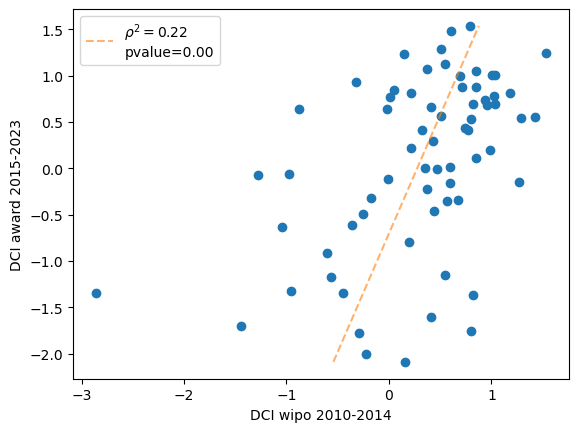

In [181]:
#DCI award vs DCI wipo
DCIs, non_present = x_vs_y(DCI_awards, DCI_wipo, awards_wipo)
DCI_reg, values = reg(DCIs)

plt.scatter(DCIs[1, :], DCIs[0, :])
plt.plot(DCI_reg[1, :], DCI_reg[0, :], linestyle = '--', alpha = 0.6, color = 'tab:orange', label = f'$\\rho^2=${values[0]**2:.2f}\npvalue={values[1]:.2f}')
plt.legend()
plt.ylabel(f'DCI award {año_awards}')
plt.xlabel(f'DCI wipo {año_wipo}')

plt.savefig('./figs/correlations/DCIs.png')

## DCI awards vs GDP per capita

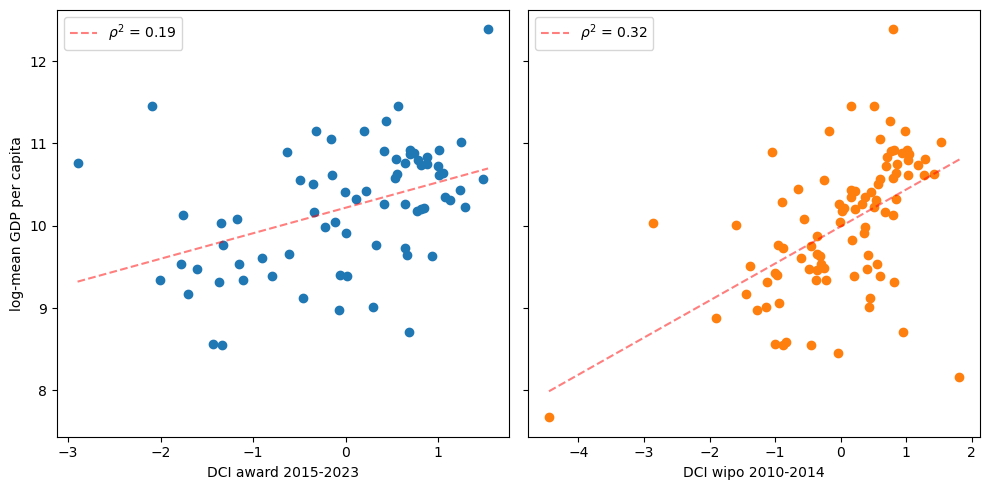

In [183]:
#DCIs vs GDP per capita
DCIa_PIB, non_present = x_vs_y(DCI_awards, PIB, awards_gdp, log = True)
DCIw_PIB, non_present = x_vs_y(DCI_wipo, PIB, wipo_gdp, log = True)

DCIa_reg, values_a = reg(DCIa_PIB)
DCIw_reg, values_w = reg(DCIw_PIB)

fig, ax = plt.subplots(1, 2, figsize = (10, 5), sharey = True)

ax[0].scatter(DCIa_PIB[0, :], DCIa_PIB[1, :])
ax[0].plot(DCIa_reg[0, :], DCIa_reg[1, :], color = 'red', linestyle = '--', alpha = 0.5, label = f'$\\rho^2$ = {values_a[0]**2:.2f}')
ax[0].set_xlabel(f'DCI award {año_awards}')
ax[0].set_ylabel(f'log-mean GDP per capita')
ax[0].legend()

ax[1].scatter(DCIw_PIB[0, :], DCIw_PIB[1, :], color = 'tab:orange')
ax[1].plot(DCIw_reg[0, :], DCIw_reg[1, :], color = 'red', linestyle = '--', alpha = 0.5, label = f'$\\rho^2$ = {values_w[0]**2:.2f}')
ax[1].set_xlabel(f'DCI wipo {año_wipo}')
ax[1].legend()

plt.tight_layout()
plt.savefig('./figs/correlations/DCIs_GDP.png')

## DCI vs GDR 2023

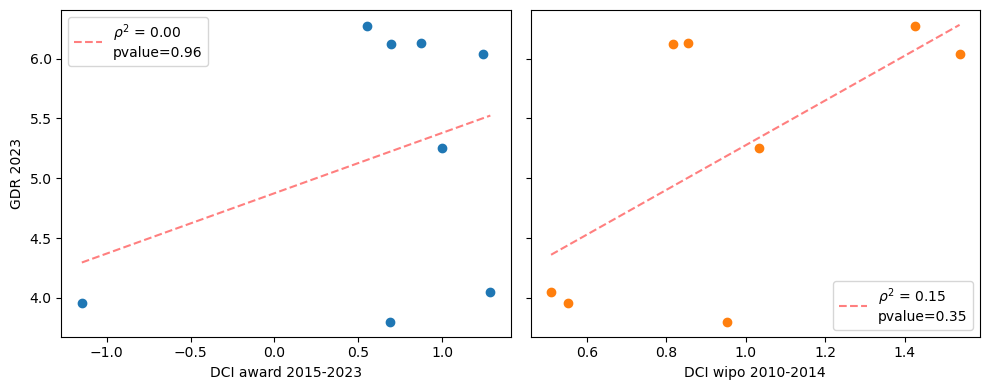

In [185]:
#DCI award vs GDR 2023
wipo_ranking = interchange_dict(wipo_awards, GDR_2023_dict)
DCIa_PIB, non_present_a = x_vs_y(DCI_awards, Ranking_Score['GDR_2023'], GDR_2023_dict)
DCIw_PIB, non_present_w = x_vs_y(DCI_wipo, Ranking_Score['GDR_2023'], wipo_ranking)

DCIa_reg, values_a = reg(DCIa_PIB)
DCIw_reg, values_w = reg(DCIw_PIB)

fig, ax = plt.subplots(1, 2, figsize = (10, 4), sharey = True)

ax[0].scatter(DCIa_PIB[0, :], DCIa_PIB[1, :])
ax[0].plot(DCIa_reg[0, :], DCIa_reg[1, :], color = 'red', linestyle = '--', alpha = 0.5, label = f'$\\rho^2$ = {values_a[0]**2:.2f}\npvalue={values_a[1]:.2f}')
ax[0].set_xlabel(f'DCI award {año_awards}')
ax[0].set_ylabel(f'GDR 2023')
ax[0].legend()



ax[1].scatter(DCIw_PIB[0, :], DCIw_PIB[1, :], color = 'tab:orange')
ax[1].plot(DCIw_reg[0, :], DCIw_reg[1, :], color = 'red', linestyle = '--', alpha = 0.5, label = f'$\\rho^2$ = {values_w[0]**2:.2f}\npvalue={values_w[1]:.2f}')
ax[1].set_xlabel(f'DCI wipo {año_wipo}')
ax[1].legend()

plt.tight_layout()
plt.savefig('./figs/correlations/DCIs_GDR2023.png')

## DCI vs DCR 20XX

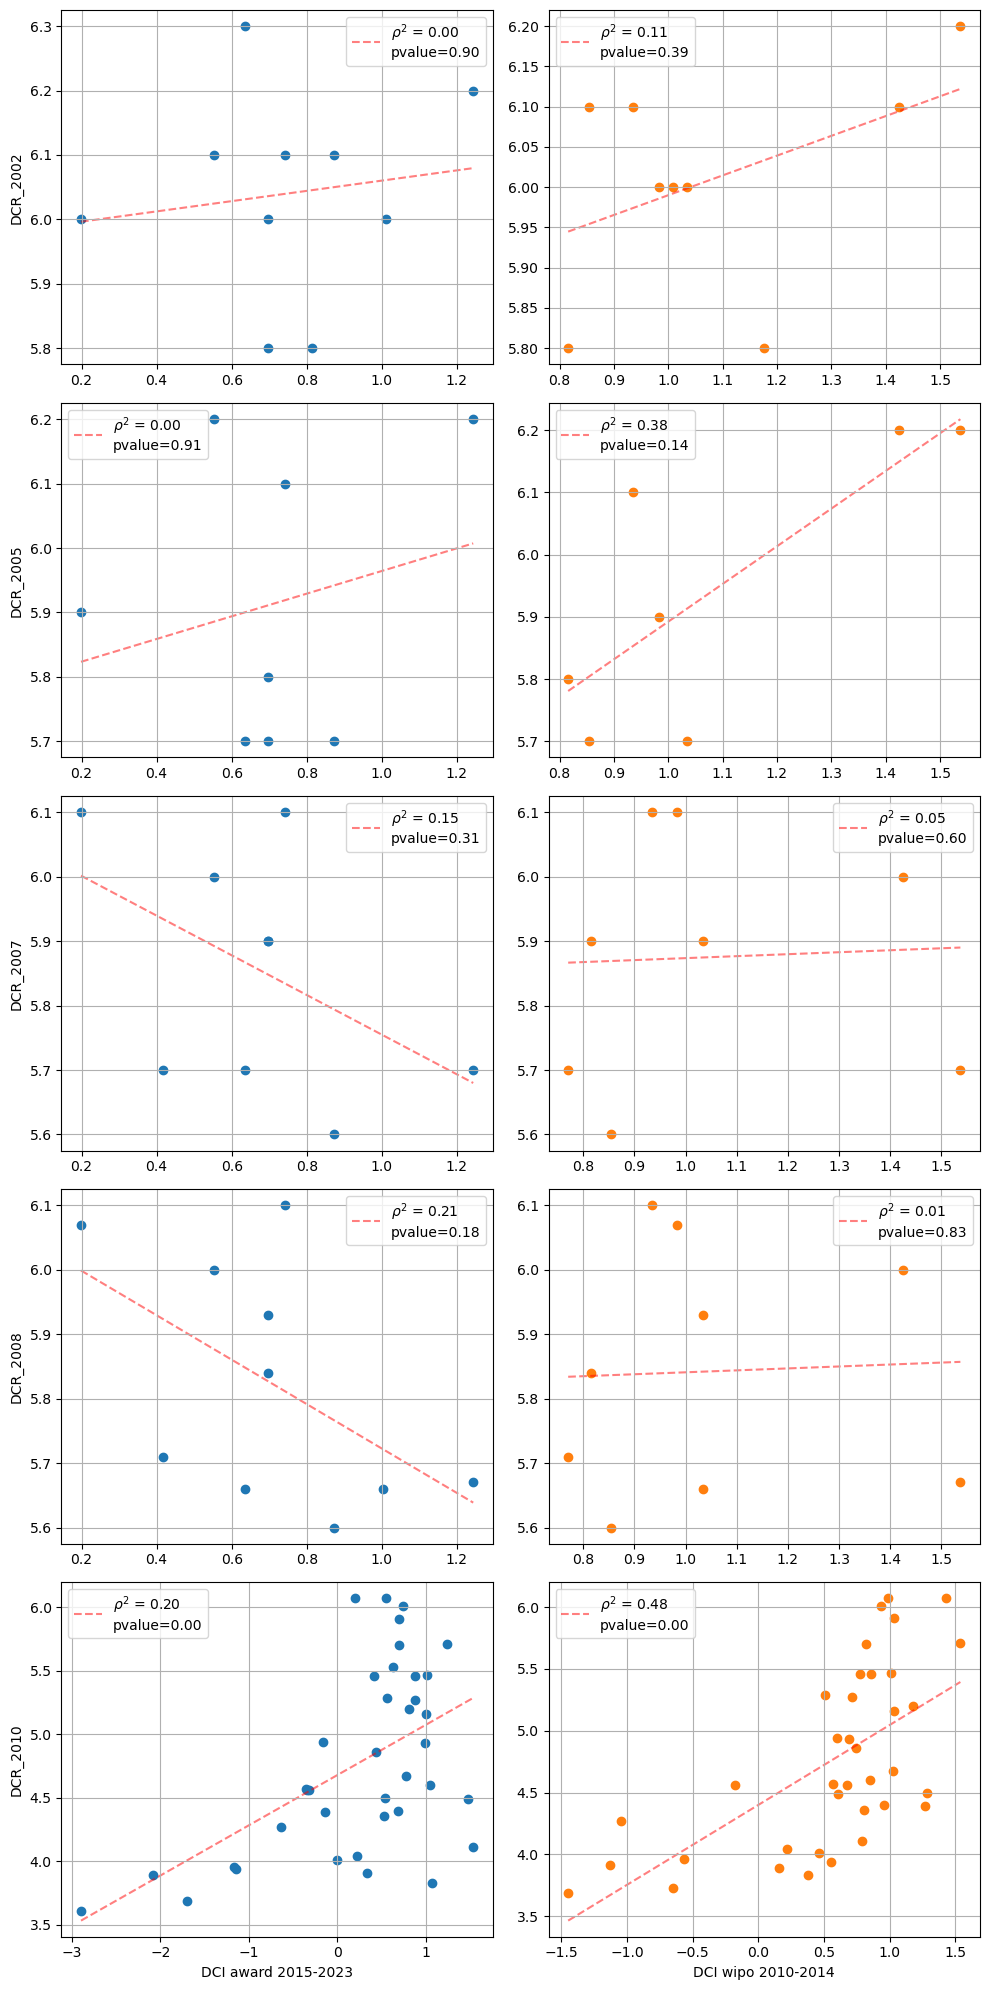

In [187]:
#DCI award vs GDP per capita
fig, ax = plt.subplots(5, 2, figsize = (10, 5 * 4))

for n, rank in enumerate(Ranking_names[1:6]):
    wipo_ranking = interchange_dict(wipo_awards, Ranking_dicts[n])
    DCIa_PIB, non_present = x_vs_y(DCI_awards, Ranking_Score[rank], Ranking_dicts[n])
    DCIw_PIB, non_present = x_vs_y(DCI_wipo, Ranking_Score[rank], wipo_ranking)
    
    DCIa_reg, values_a = reg(DCIa_PIB)
    DCIw_reg, values_w = reg(DCIw_PIB)
    
    ax[n, 0].scatter(DCIa_PIB[0, :], DCIa_PIB[1, :], zorder = 1)
    ax[n, 0].plot(DCIa_reg[0, :], DCIa_reg[1, :], color = 'red', linestyle = '--', alpha = 0.5, label = f'$\\rho^2$ = {values_a[0]**2:.2f}\npvalue={values_a[1]:.2f}', zorder = 1)
    ax[n, 0].set_ylabel(f'{rank}')
    ax[n, 0].legend()
    ax[n, 0].grid(zorder = 0)
    
    ax[n, 1].scatter(DCIw_PIB[0, :], DCIw_PIB[1, :], color = 'tab:orange', zorder = 1)
    ax[n, 1].plot(DCIw_reg[0, :], DCIw_reg[1, :], color = 'red', linestyle = '--', alpha = 0.5, label = f'$\\rho^2$ = {values_w[0]**2:.2f}\npvalue={values_w[1]:.2f}', zorder = 1)
    ax[n, 1].legend()
    ax[n, 1].grid(zorder = 0)

ax[4, 0].set_xlabel(f'DCI award {año_awards}')
ax[4, 1].set_xlabel(f'DCI wipo {año_wipo}')
plt.tight_layout()
plt.savefig('./figs/correlations/DCIs_DCR20XX.png')

## DCI vs IDS

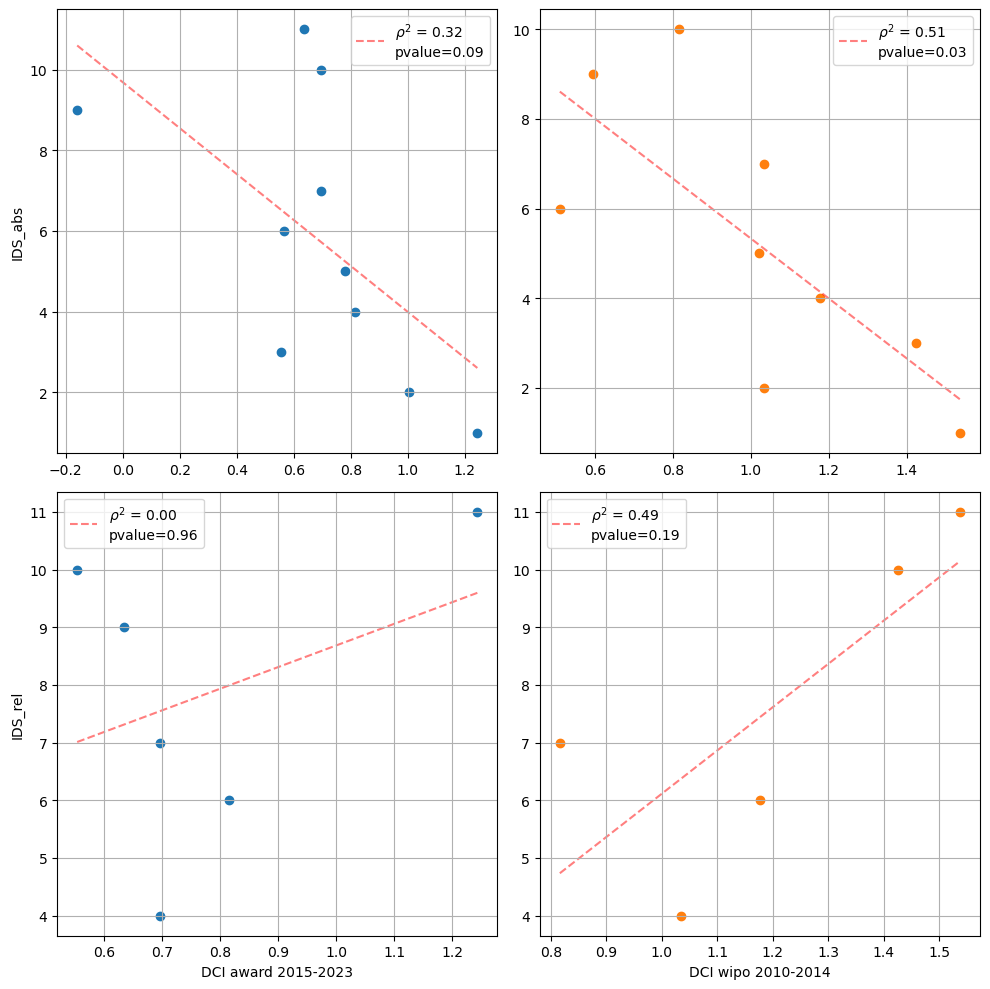

In [189]:
fig, ax = plt.subplots(2, 2, figsize = (10, 5 * 2))

for n, rank in enumerate(Ranking_names[7:]):
    wipo_ranking = interchange_dict(wipo_awards, Ranking_dicts[n])
    DCIa_PIB, non_present = x_vs_y(DCI_awards, Ranking_Score[rank], Ranking_dicts[n])
    DCIw_PIB, non_present = x_vs_y(DCI_wipo, Ranking_Score[rank], wipo_ranking)
    
    DCIa_reg, values_a = reg(DCIa_PIB)
    DCIw_reg, values_w = reg(DCIw_PIB)
    
    ax[n, 0].scatter(DCIa_PIB[0, :], DCIa_PIB[1, :], zorder = 1)
    ax[n, 0].plot(DCIa_reg[0, :], DCIa_reg[1, :], color = 'red', linestyle = '--', alpha = 0.5, label = f'$\\rho^2$ = {values_a[0]**2:.2f}\npvalue={values_a[1]:.2f}', zorder = 1)
    ax[n, 0].set_ylabel(f'{rank}')
    ax[n, 0].legend()
    ax[n, 0].grid(zorder = 0)
    
    ax[n, 1].scatter(DCIw_PIB[0, :], DCIw_PIB[1, :], color = 'tab:orange', zorder = 1)
    ax[n, 1].plot(DCIw_reg[0, :], DCIw_reg[1, :], color = 'red', linestyle = '--', alpha = 0.5, label = f'$\\rho^2$ = {values_w[0]**2:.2f}\npvalue={values_w[1]:.2f}', zorder = 1)
    ax[n, 1].legend()
    ax[n, 1].grid(zorder = 0)

ax[1, 0].set_xlabel(f'DCI award {año_awards}')
ax[1, 1].set_xlabel(f'DCI wipo {año_wipo}')
plt.tight_layout()
plt.savefig('./figs/correlations/DCIs_IDS.png')

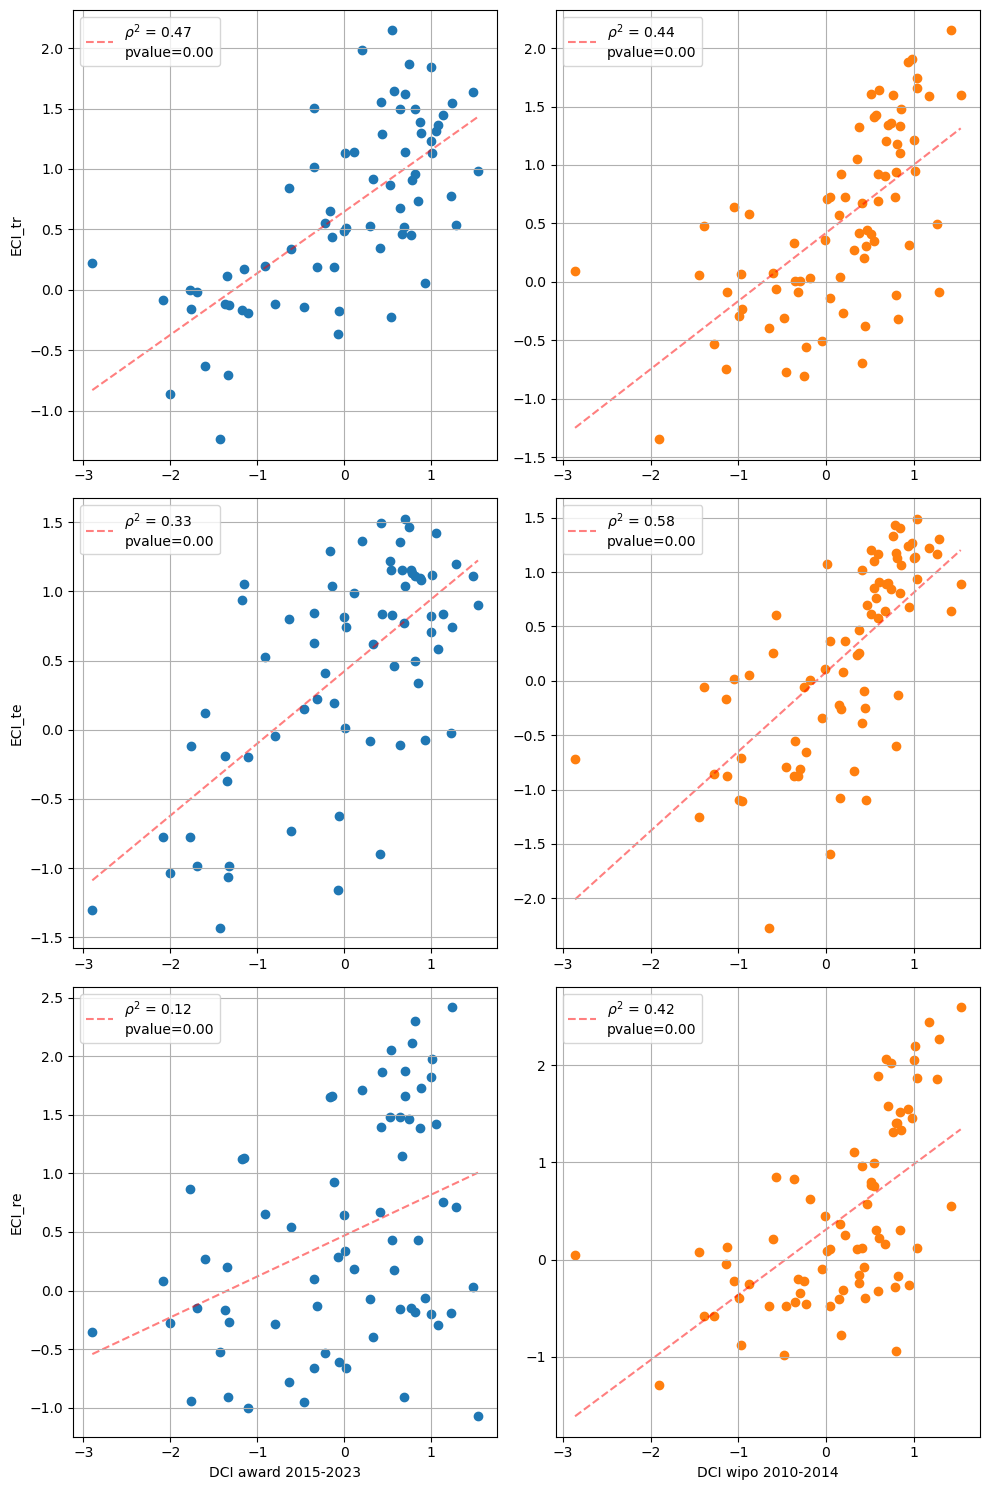

In [277]:
fig, ax = plt.subplots(3, 2, figsize = (10, 5 * 3))

for n, rank in enumerate(ECI_names):
    wipo_ranking = interchange_dict(wipo_awards, awards_OEC)
    DCIa_PIB, non_present = x_vs_y(DCI_awards, ECIs[rank]['mean_awards'], awards_OEC)
    DCIw_PIB, non_present = x_vs_y(DCI_wipo, ECIs[rank]['mean_1'], wipo_ranking)
    
    DCIa_reg, values_a = reg(DCIa_PIB)
    DCIw_reg, values_w = reg(DCIw_PIB)
    
    ax[n, 0].scatter(DCIa_PIB[0, :], DCIa_PIB[1, :], zorder = 1)
    ax[n, 0].plot(DCIa_reg[0, :], DCIa_reg[1, :], color = 'red', linestyle = '--', alpha = 0.5, label = f'$\\rho^2$ = {values_a[0]**2:.2f}\npvalue={values_a[1]:.2f}', zorder = 1)
    ax[n, 0].set_ylabel(f'{rank}')
    ax[n, 0].legend()
    ax[n, 0].grid(zorder = 0)
    
    ax[n, 1].scatter(DCIw_PIB[0, :], DCIw_PIB[1, :], color = 'tab:orange', zorder = 1)
    ax[n, 1].plot(DCIw_reg[0, :], DCIw_reg[1, :], color = 'red', linestyle = '--', alpha = 0.5, label = f'$\\rho^2$ = {values_w[0]**2:.2f}\npvalue={values_w[1]:.2f}', zorder = 1)
    ax[n, 1].legend()
    ax[n, 1].grid(zorder = 0)

ax[2, 0].set_xlabel(f'DCI award {año_awards}')
ax[2, 1].set_xlabel(f'DCI wipo {año_wipo}')
plt.tight_layout()

plt.savefig('./figs/correlations/DCIs_ECIs.png')